In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
data = pd.read_csv("Global.csv")
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [122]:
data.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [124]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [125]:
#veri çok fazla büyük olduğu zaman bu tercih edilir
data.to_pickle("data.pickle")
data.to_parquet("data.parquet") --> #pip install 'pyarrow', 'fastparque'

SyntaxError: invalid syntax (926339068.py, line 3)

In [126]:
data.shape

(239177, 7)

In [127]:
data.isna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239172,False,False,False,False,False,False,False
239173,False,False,False,False,False,False,False
239174,False,False,False,False,False,False,False
239175,False,False,False,False,False,False,False


In [128]:
data.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [129]:
data.isna().sum() / data.shape[0] * 100

dt                               0.000000
AverageTemperature               4.599941
AverageTemperatureUncertainty    4.599941
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [130]:
#data.dropna(axis=0) #satırdan siler
#data.dropna(axis=1) #kolondan siler

In [131]:
data_prepared=data.dropna(axis=0,how="any")

In [132]:
data_prepared.shape

(228175, 7)

In [133]:
data_prepared.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [134]:
data_prepared.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [135]:
data_prepared["City"] #pandas serisi

0         Abidjan
1         Abidjan
2         Abidjan
3         Abidjan
4         Abidjan
           ...   
239171       Xian
239172       Xian
239173       Xian
239174       Xian
239175       Xian
Name: City, Length: 228175, dtype: object

In [136]:
data_prepared[["City"]] #dataframe

,City
0,Abidjan
1,Abidjan
2,Abidjan
3,Abidjan
4,Abidjan
...,...
239171,Xian
239172,Xian
239173,Xian
239174,Xian


In [137]:
data_prepared["Country"].value_counts()

China                                 34952
India                                 34627
Brazil                                12139
Turkey                                 9239
United States                          8237
Egypt                                  7550
Pakistan                               6490
Russia                                 6332
Canada                                 6282
Nigeria                                5200
Australia                              4138
Japan                                  4050
Colombia                               4003
Saudi Arabia                           3856
Indonesia                              3758
South Africa                           3746
Spain                                  3166
Italy                                  3166
Germany                                3166
United Kingdom                         3166
Ukraine                                3166
France                                 3166
Morocco                         

In [138]:
data_prepared["Country"].value_counts().shape

(49,)

In [139]:
data_prepared[data_prepared["Country"]=="Turkey"]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
96617,2013-04-01,16.643,0.337,Izmir,Turkey,37.78N,26.44E
96618,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E
96619,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E
96620,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E


In [ ]:
data_prepared[(data_prepared["Country"]=="Turkey")] | (data_prepared["Country"] == 'Brazil')

In [140]:
data_selected=data_prepared[data_prepared["Country"].isin(["Turkey","Brazil","United States"])]

In [141]:
data_selected["Country"].value_counts()

Brazil           12139
Turkey            9239
United States     8237
Name: Country, dtype: int64

In [142]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [143]:
data_selected.groupby(by="Country").mean()

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Brazil,22.847555,0.877419
Turkey,13.790998,1.391654
United States,11.257246,1.200292


In [144]:
data_selected.groupby(by="Country").max()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude
Country,,,,,,
Brazil,2013-08-01,29.986,5.277,São Paulo,4.02S,47.50W
Turkey,2013-08-01,29.845,8.459,Izmir,40.99N,33.29E
United States,2013-09-01,29.141,10.193,New York,42.59N,87.27W


In [145]:
data_selected.groupby(by="Country").agg(["min","mean","max"])

C:\Users\SERKAN\AppData\Local\Temp\ipykernel_1984\3111245002.py:1: FutureWarning: ['dt', 'City', 'Latitude', 'Longitude'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_selected.groupby(by="Country").agg(["min","mean","max"])


AverageTemperature                     \
                             min       mean     max   
Country                                               
Brazil                    13.536  22.847555  29.986   
Turkey                    -6.280  13.790998  29.845   
United States             -9.162  11.257246  29.141   

              AverageTemperatureUncertainty                    
                                        min      mean     max  
Country                                                        
Brazil                                0.040  0.877419   5.277  
Turkey                                0.062  1.391654   8.459  
United States                         0.075  1.200292  10.193

In [146]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [147]:
data_selected[data_selected["Country"]=="Turkey"]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
96617,2013-04-01,16.643,0.337,Izmir,Turkey,37.78N,26.44E
96618,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E
96619,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E
96620,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E


In [148]:
data_selected[data_selected["Country"]=="Turkey"]["AverageTemperature"]

11893    -3.657
11894    -2.453
11895     4.458
11898    21.018
11899    22.099
          ...  
96617    16.643
96618    21.723
96619    24.416
96620    26.451
96621    27.430
Name: AverageTemperature, Length: 9239, dtype: float64

In [149]:
tr_avg_temps=data_selected[data_selected["Country"]=="Turkey"]["AverageTemperature"]
br_avg_temps=data_selected[data_selected["Country"]=="Brazil"]["AverageTemperature"]
usa_avg_temps=data_selected[data_selected["Country"]=="United States"]["AverageTemperature"]

C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

<AxesSubplot:xlabel='AverageTemperature', ylabel='Density'>

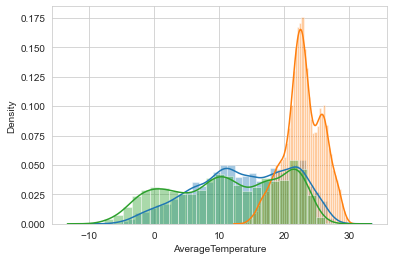

In [150]:
sns.distplot(tr_avg_temps)
sns.distplot(br_avg_temps)
sns.distplot(usa_avg_temps)

In [151]:
data_selected["Country"].value_counts().index

Index(['Brazil', 'Turkey', 'United States'], dtype='object')

C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

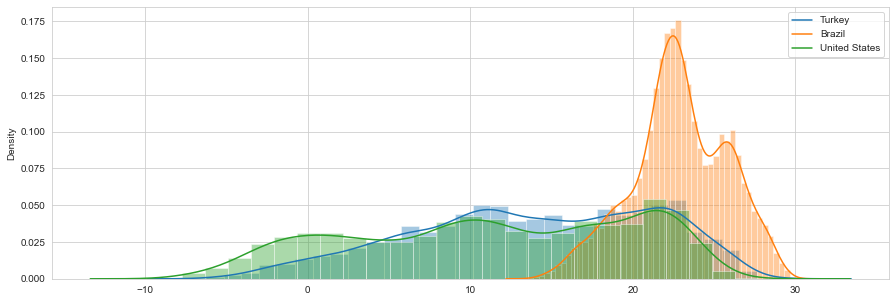

In [152]:
sns.set_style("whitegrid") #girdleri ekledik
plt.figure(figsize=(15, 5)) #boyut ile alakalı işlemler
ulkeler = data_selected["Country"].unique()

for ulke in ulkeler:
    sns.distplot(data_selected[data_selected["Country"]==ulke][["AverageTemperature"]])
plt.legend(ulkeler)  #hangi rengin hangi ülkeyi temsil ettiğini                                            

C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

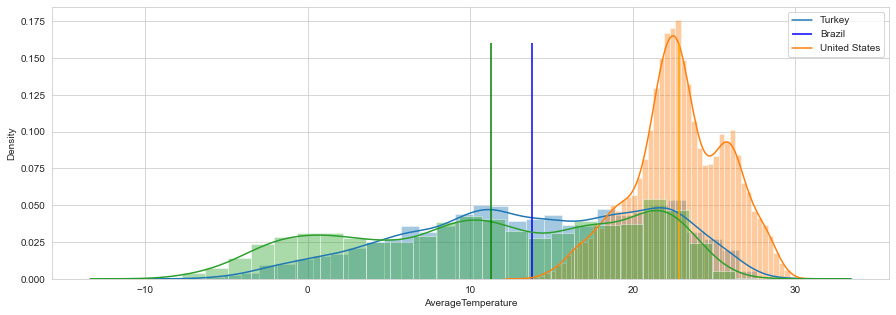

In [153]:
sns.set_style("whitegrid") #girdleri ekledik
plt.figure( figsize=(15, 5) ) #boyut ile alakalı işlemler
colors=["blue","orange","green"]

for color, ulke in zip(colors,ulkeler):
    sns.distplot(data_selected[data_selected["Country"]==ulke]["AverageTemperature"])
    ulke_mean=data_selected[data_selected["Country"]==ulke]["AverageTemperature"].mean()
    plt.vlines(ulke_mean,0,0.16,colors=color)                                                                      
plt.legend(ulkeler)  #hangi rengin hangi ülkeyi temsil ettiğini                                            

In [154]:
#tam otomatik
data_selected.columns[1:3]

Index(['AverageTemperature', 'AverageTemperatureUncertainty'], dtype='object')

C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

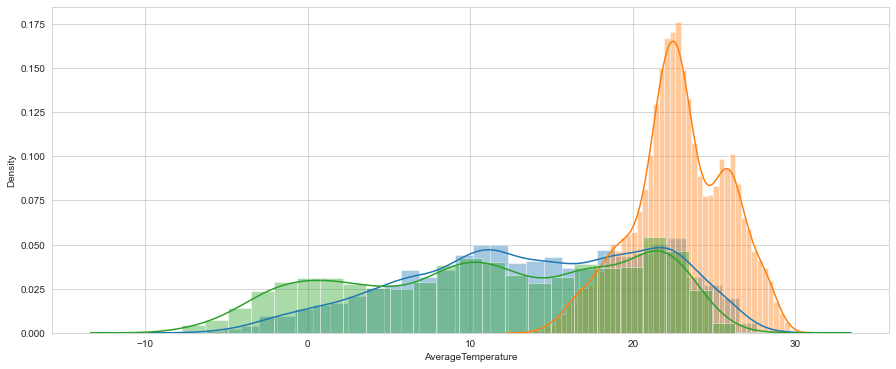

C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SERKAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

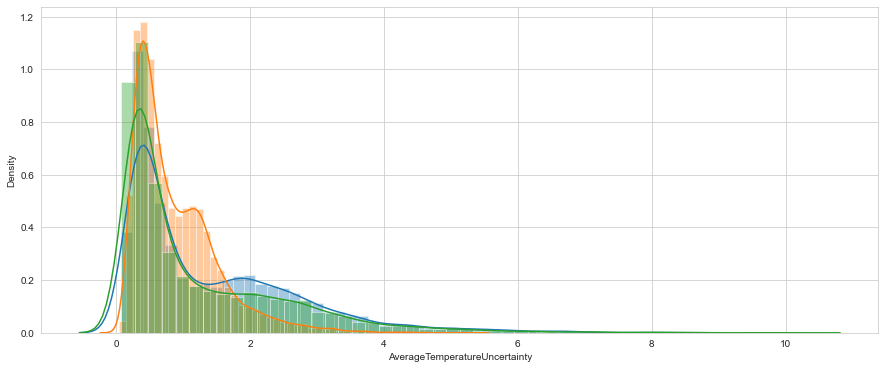

In [155]:
kolonlar=data_selected.columns[1:3]
ulkeler=data_selected["Country"].unique()

for kolon in kolonlar:
    plt.figure(figsize=(15,6))
    
    for ulke in ulkeler:
        sns.distplot(data_selected[data_selected["Country"]==ulke][kolon])
    plt.show() 

In [156]:
#scatterplot
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [157]:
tr_data=data_selected[(data_selected["Country"]=="Turkey") & (data_selected["dt"]>"01.01.1900")]
tr_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

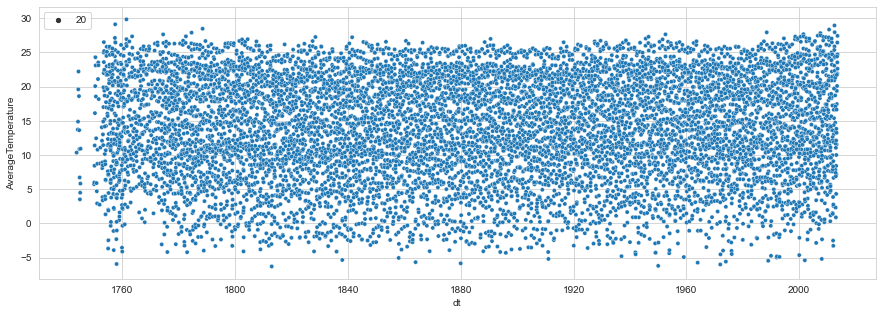

In [228]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt",y="AverageTemperature",data=tr_data,size=20)

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

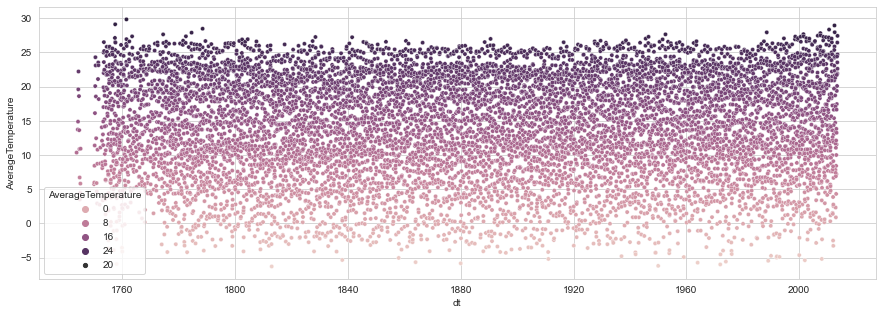

In [227]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt",y="AverageTemperature",data=tr_data,hue="AverageTemperature",size=20)

In [160]:
tr_data["City"].value_counts()

Istanbul    3166
Izmir       3128
Ankara      2945
Name: City, dtype: int64

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

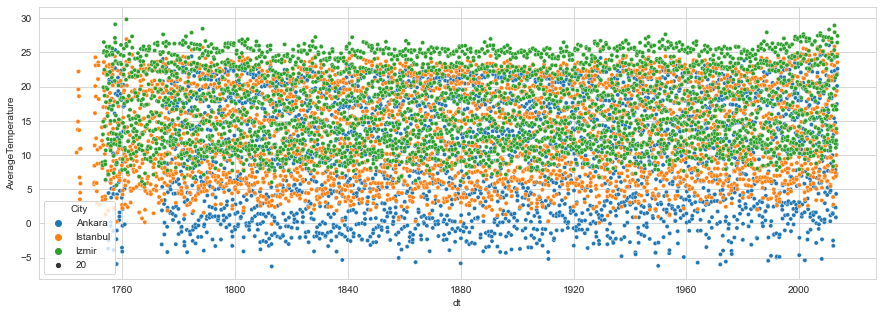

In [226]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt",y="AverageTemperature",data=tr_data,hue="City",size=20)

In [162]:
tr_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [169]:
pd.options.mode.chained_assignment = None
tr_data['dt'] = pd.to_datetime(tr_data['dt'], errors='coerce')
tr_data_means=tr_data.groupby(tr_data["dt"].dt.to_period("Y")).mean()
tr_data_means=tr_data_means.reset_index()
tr_data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype        
---  ------                         --------------  -----        
 0   dt                             267 non-null    period[A-DEC]
 1   AverageTemperature             267 non-null    float64      
 2   AverageTemperatureUncertainty  267 non-null    float64      
dtypes: float64(2), period[A-DEC](1)
memory usage: 6.4 KB


In [221]:
tr_data_means=tr_data["dt"].astype("string").astype("datetime64")

In [177]:
tr_data_means.info

<bound method Series.info of 0     1743-01-01
1     1744-01-01
2     1745-01-01
3     1750-01-01
4     1751-01-01
         ...    
262   2009-01-01
263   2010-01-01
264   2011-01-01
265   2012-01-01
266   2013-01-01
Name: dt, Length: 267, dtype: datetime64[ns]>

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

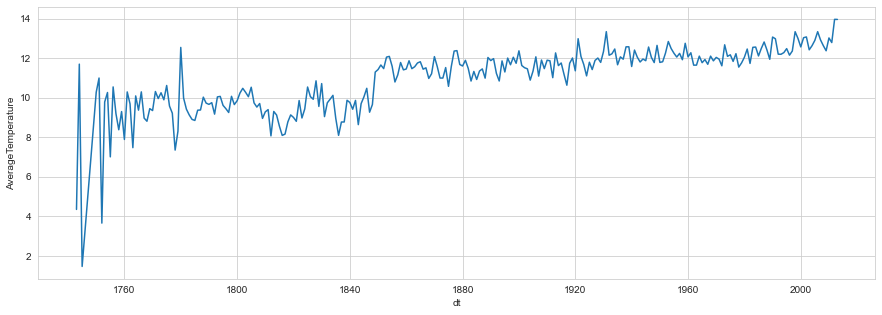

In [225]:
plt.figure(figsize=(15,5))

sns.lineplot(x="dt",y="AverageTemperature",data=data)

In [179]:
data_1900=data_selected[data_selected["dt"] > "01.01.1900"]

In [180]:
data_1900.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [213]:
data_mean = data_1900.groupby(["Country",data_1900["dt"].dt.to_period("Y")]).mean()
data_means=data_mean.reset_index()
data_means["dt"]=data_means["dt"].astype("string").astype("datetime64")
data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Country                        715 non-null    object        
 1   dt                             715 non-null    datetime64[ns]
 2   AverageTemperature             715 non-null    float64       
 3   AverageTemperatureUncertainty  715 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 22.5+ KB


In [214]:
data_means

,Country,dt,AverageTemperature,AverageTemperatureUncertainty
0,Brazil,1832-01-01,21.407183,2.373917
1,Brazil,1833-01-01,22.330217,2.143100
2,Brazil,1834-01-01,21.722133,2.064150
3,Brazil,1835-01-01,21.088067,1.897400
4,Brazil,1836-01-01,21.339483,2.017933
...,...,...,...,...
710,United States,2009-01-01,12.372389,0.325028
711,United States,2010-01-01,13.020167,0.337444
712,United States,2011-01-01,12.787111,0.355472
713,United States,2012-01-01,13.960778,0.393278


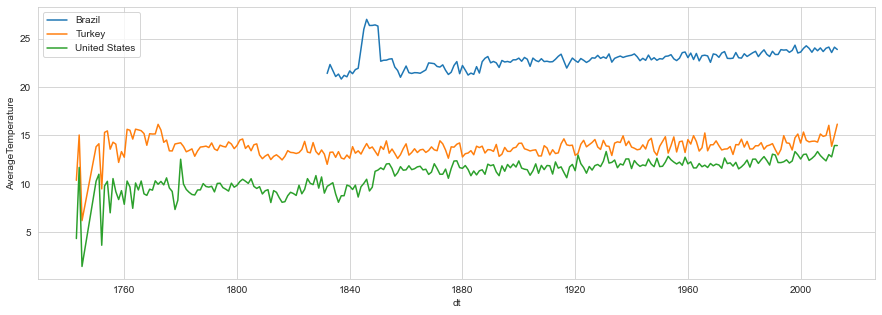

In [215]:
plt.figure(figsize=(15,5))

for ulke in data_means["Country"].unique():
    data=data_means[data_means["Country"]==ulke]
    sns.lineplot(x="dt",y="AverageTemperature",data=data)
    
plt.legend(data_means["Country"].unique())

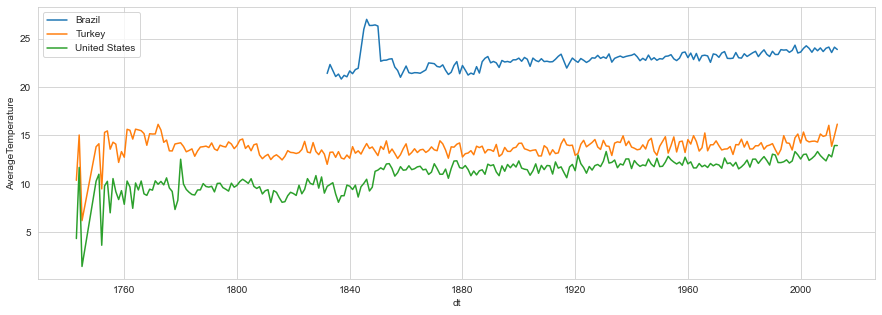

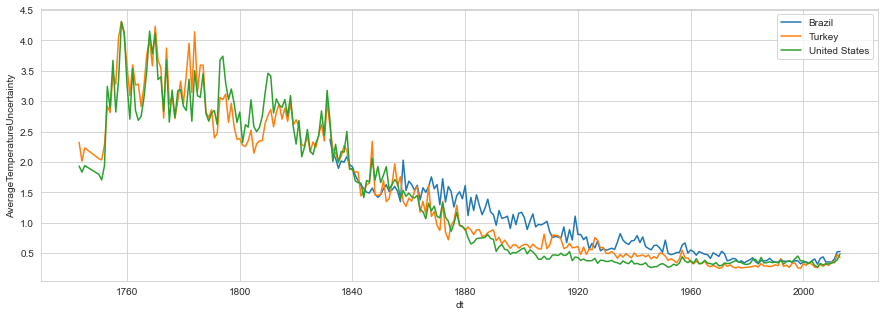

In [216]:
for col in data_means.columns[2:4]:
    plt.figure(figsize=(15,5))

    for ulke in data_means["Country"].unique():
        data=data_means[data_means["Country"]==ulke]
        sns.lineplot(x="dt",y=col,data=data)
    
        plt.legend(data_means["Country"].unique())
    plt.show()